## HW8: Make a plot, any plot
#### Data:  NYC Parks Daily Tasks Cleaning Records, Fiscal Year 2016 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import json
import pylab as pl
%pylab inline
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# get data for just Manhattan
url = "https://data.cityofnewyork.us/resource/rcsc-s473.json?$limit=800000&$where=sector_name%20like%20'%25Manhattan%25'"

In [3]:
def get_json_data(url):
    """
    
    """
    response = urllib.urlopen(url)
    data = response.read().decode("utf-8")
    return pd.read_json(data, orient= "records")

In [4]:
work = get_json_data(url)
print(work.shape)

(156714, 33)


In [5]:
import datetime as dt

In [6]:
work["date_worked"] = pd.to_datetime(work["date_worked"])
work["end_time"] = pd.to_datetime(work.end_time).dt.time
work["start_time"] = pd.to_datetime(work.start_time).dt.time
work["borough"] = work.sector_name.str.split('Sector', expand= True)[0]

In [7]:
work.head()

,activity,animal_waste,broken_glass,daily_task_activity_id,daily_task_id,date_worked,district,dt_system,dumping,end_time,...,propid,rel_day,rel_week,route_id,sector_desc,sector_name,signname,start_time,vehicle_number,borough
0,Work,0,0,277961.0,65143.0,2016-01-08,M-12,Daily Tasks,0.0,08:45:00,...,M042-03,191,28,1333.0,"Districts 12, 12A",Manhattan Sector A,Inwood Hill Park,08:30:00,5839.0,Manhattan
1,Work,0,0,277967.0,65143.0,2016-01-08,M-12,Daily Tasks,0.0,09:30:00,...,M043-ZN01,191,28,1333.0,"Districts 12, 12A",Manhattan Sector A,Isham Park,09:10:00,5839.0,Manhattan
2,Work,0,0,677613.0,152520.0,2016-06-20,M-12,Daily Tasks,0.0,14:00:00,...,M043-ZN01,355,51,1445.0,"Districts 12, 12A",Manhattan Sector A,Isham Park,13:30:00,0.0,Manhattan
3,Work,0,0,677617.0,152520.0,2016-06-20,M-12,Daily Tasks,0.0,15:00:00,...,MZ96,355,51,1445.0,"Districts 12, 12A",Manhattan Sector A,NULL,14:45:00,0.0,Manhattan
4,Work,0,0,677620.0,152520.0,2016-06-20,M-12,Daily Tasks,0.0,15:20:00,...,M026,355,51,1445.0,"Districts 12, 12A",Manhattan Sector A,Dyckman House Museum,15:00:00,0.0,Manhattan


In [8]:
# only keep some columns
keep_cols = ["animal_waste", "broken_glass", "graffiti","dumping","medical_waste","signname"]
work = work[keep_cols]
print(work.columns)

Index(['animal_waste', 'broken_glass', 'graffiti', 'dumping', 'medical_waste',
       'signname'],
      dtype='object')


In [9]:
# remove observations where the park name is not listed (= NULL)
work = work[work["signname"] != "NULL"]
print(work.shape)

(134524, 6)


In [10]:
# drop observations that contain NA
work.dropna(inplace=True)
print(work.shape)

(111569, 6)


In [21]:
# Filter rows to only include a select number of parks.
work_ = work[work.signname.isin(["Bryant Park","Union Square Park", "Madison Square Park", "Washington Square Park","Inwood Hill Park"])]
work_.shape

(7345, 6)

In [22]:
# Transform data to get "issue" variable
work_ = pd.melt(work_,value_vars=["animal_waste", "broken_glass", "graffiti","dumping","medical_waste"],var_name="issue",id_vars=["signname"])
work_.head()

,signname,issue,value
0,Inwood Hill Park,animal_waste,0.0
1,Inwood Hill Park,animal_waste,0.0
2,Inwood Hill Park,animal_waste,0.0
3,Inwood Hill Park,animal_waste,0.0
4,Inwood Hill Park,animal_waste,0.0


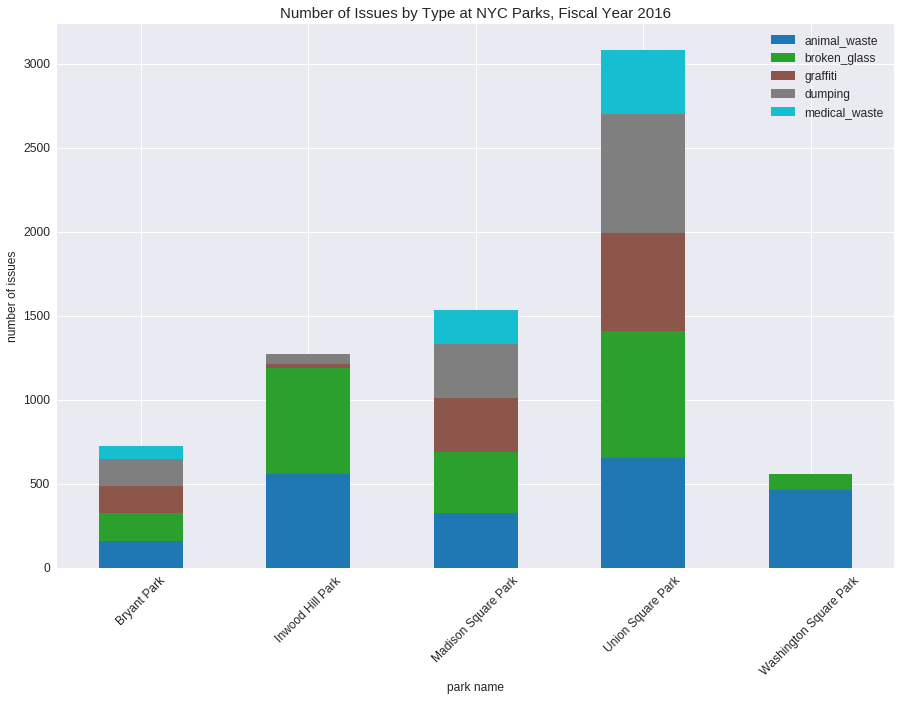

In [138]:
#work_ = work_.groupby(["signname","issue"]).sum()
#work_ = work_.unstack()
ax = work_.plot(kind='bar',stacked=True,colormap="tab10",\
           title= "Number of Issues by Type at NYC Parks, Fiscal Year 2016", figsize= (15,10))

ax.set(xlabel= "park name", ylabel = "number of issues")
ax.legend(["animal_waste", "broken_glass", "graffiti","dumping","medical_waste"],fontsize=12)
ax.tick_params(axis="x",rotation=45, labelsize= 12)
ax.tick_params(axis="y", labelsize= 12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ax.title.set_size(15)



In [139]:
fig = ax.get_figure()

In [140]:
fig.savefig("/wingrdp/homedirs/mms991/PUI2017/HW8")

In [69]:
import os
os.getcwd()

'/wingrdp/homedirs/mms991/PUI2017/HW8'